<a href="https://colab.research.google.com/github/mekaneeky/GoMyCode-Intro2AI-notebooks/blob/main/GMC_AI_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

from sklearn import preprocessing
from copy import deepcopy
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA

In [2]:
!gdown --id 1P_jFdkc6FEai2W3RwcF5z5UIA60Our4Q

Downloading...
From: https://drive.google.com/uc?id=1P_jFdkc6FEai2W3RwcF5z5UIA60Our4Q
To: /content/CC GENERAL.csv
100% 903k/903k [00:00<00:00, 56.2MB/s]


In [4]:
credit_df = pd.read_csv("CC GENERAL.csv")
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# I think the median is more robust to outliers as it is not
# directly dependant on the numerical value of the data points 
credit_df.fillna(credit_df["MINIMUM_PAYMENTS"].median(), inplace=True)
credit_df.fillna(credit_df["CREDIT_LIMIT"].median(), inplace=True)

In [6]:
credit_df.drop(columns="CUST_ID", inplace=True)
credit_normal_df = deepcopy(credit_df)


In [7]:
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
scaler = preprocessing.MinMaxScaler() 
scaled_values = scaler.fit_transform(credit_df) 
credit_normal_df.loc[:,:] = scaled_values

In [9]:
credit_normal_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


In [10]:
model_regular=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels_regular=model_regular.fit_predict(credit_df)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

model_normal=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels_normal=model_normal.fit_predict(credit_normal_df)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


In [54]:
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(credit_df)

kmeans_normal=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans_normal.fit(credit_normal_df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [12]:


pca_t = PCA(2)
pca_t.fit(credit_df)
pca_results =  pca_t.transform(credit_df)

pca_t_normal = PCA(2)
pca_t_normal.fit(credit_normal_df)
pca_results_normal = pca_t.transform(credit_normal_df)

agglomerative_reg = pd.DataFrame(clust_labels_regular, columns=["agg_labels"])
agglomerative_normal = pd.DataFrame(clust_labels_normal, columns=["agg_labels"])

credit_df = credit_df.join(agglomerative_reg)
credit_normal_df = credit_normal_df.join(agglomerative_normal)

pca_reg =  pd.DataFrame(pca_results, columns=["pca_1", "pca_2"])
pca_normal =  pd.DataFrame(pca_results_normal, columns=["pca_1", "pca_2"])

credit_df = credit_df.join(pca_reg)
credit_normal_df = credit_normal_df.join(pca_normal)

kmeans_reg_results =  pd.DataFrame(kmeans.labels_, columns=["kmeans_labels"])
kmeans_normal_results =  pd.DataFrame(kmeans_normal.labels_, columns=["kmeans_labels"])

credit_df = credit_df.join(kmeans_reg_results)
credit_normal_df = credit_normal_df.join(kmeans_normal_results)


In [13]:
credit_normal_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,agg_labels,pca_1,pca_2,kmeans_labels
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,1,-5178.429400,1247.120998,1
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,1,-5178.175017,1246.985843,1
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,0,-5178.229413,1247.001649,4
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0,1,-5178.239711,1247.022873,1
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,1,-5178.408875,1247.108717,1


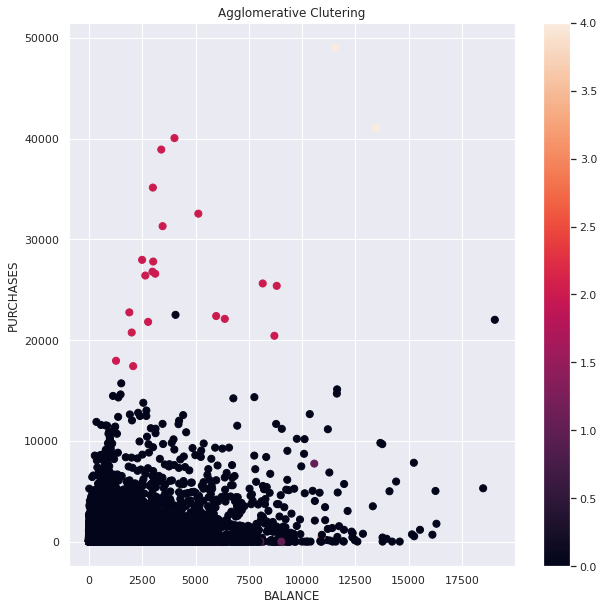

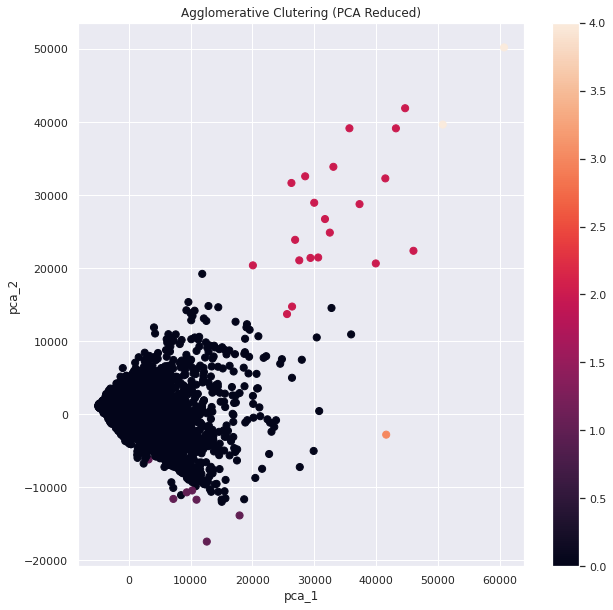

In [64]:
fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (credit_df ['BALANCE'] , credit_df ["PURCHASES"], c= credit_df["agg_labels"], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (credit_df ['pca_1'] , credit_df ["pca_2"], c= credit_df["agg_labels"], s=50)
ax.set_title("Agglomerative Clutering (PCA Reduced)")
ax.set_xlabel("pca_1")
ax.set_ylabel("pca_2")
plt.colorbar(scatter)


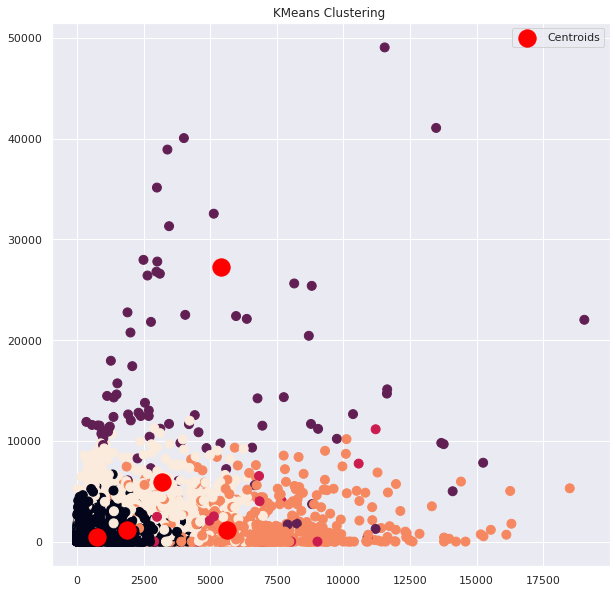

In [65]:
fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


plt.scatter(credit_df ['BALANCE'],          
            credit_df ['PURCHASES'],s=80,c=credit_df["kmeans_labels"])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=300, c='red', label = 'Centroids')
plt.title('KMeans Clustering ')
plt.legend()
plt.show()


In [55]:
kmeans_pca=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans_pca.fit(credit_df[ ["pca_1","pca_2"] ])

kmeans_normal_pca=KMeans(n_clusters=4, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans_normal_pca.fit(credit_normal_df[ ["pca_1","pca_2"] ])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

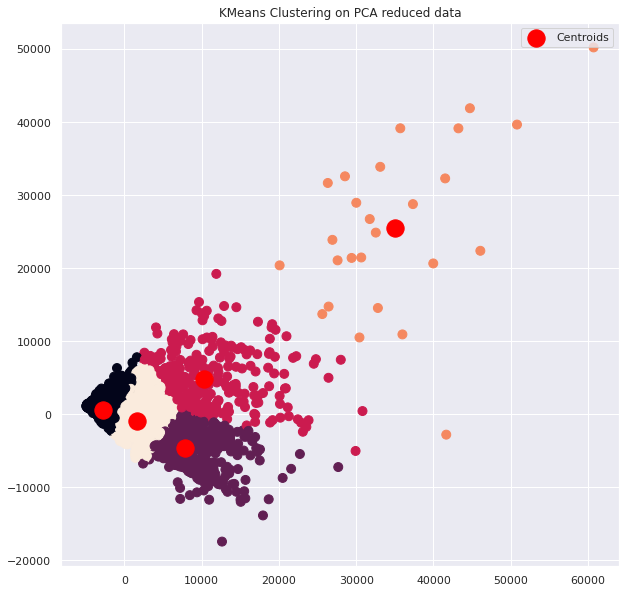

In [66]:
fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


plt.scatter(credit_df ['pca_1'],          
            credit_df ['pca_2'],s=80,c=kmeans_pca.labels_)

plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('KMeans Clustering on PCA reduced data')
plt.legend()
plt.show()


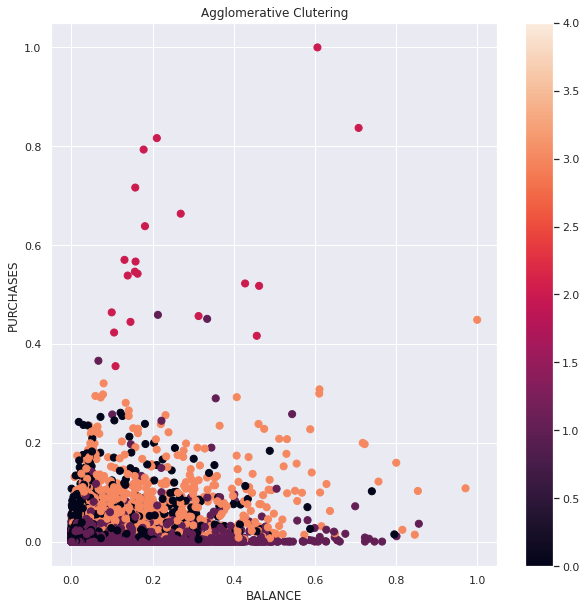

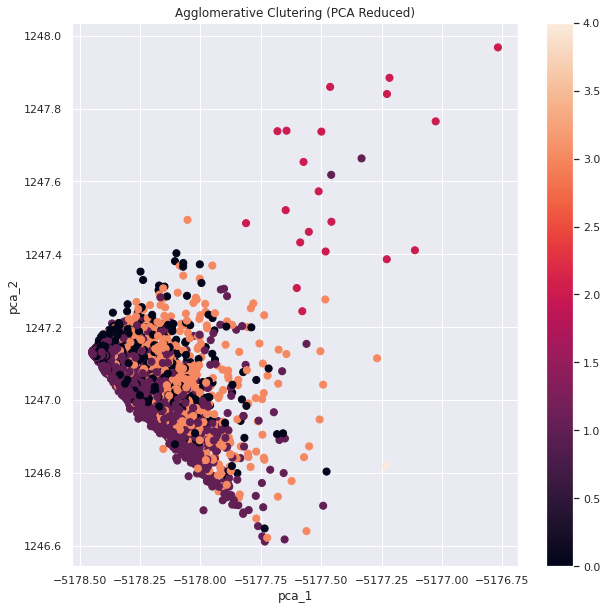

In [67]:
fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (credit_normal_df ['BALANCE'] , credit_normal_df ["PURCHASES"],c=credit_normal_df["agg_labels"] , s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)
fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (credit_normal_df ['pca_1'] , credit_normal_df ["pca_2"],c=credit_normal_df["agg_labels"] , s=50)
ax.set_title("Agglomerative Clutering (PCA Reduced)")
ax.set_xlabel("pca_1")
ax.set_ylabel("pca_2")
plt.colorbar(scatter)

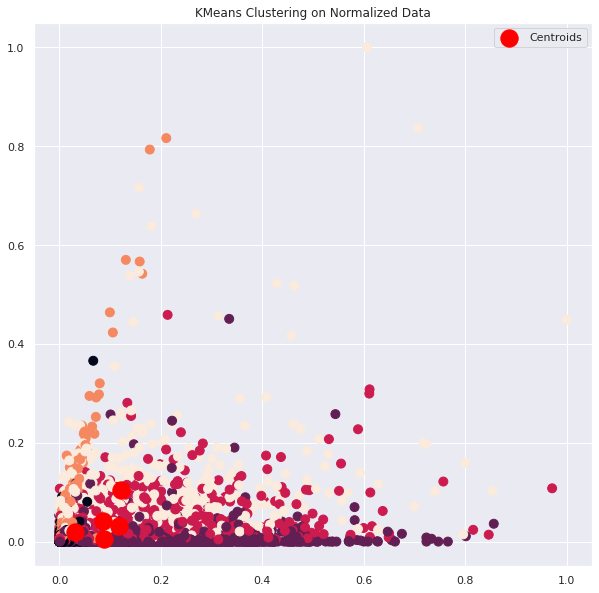

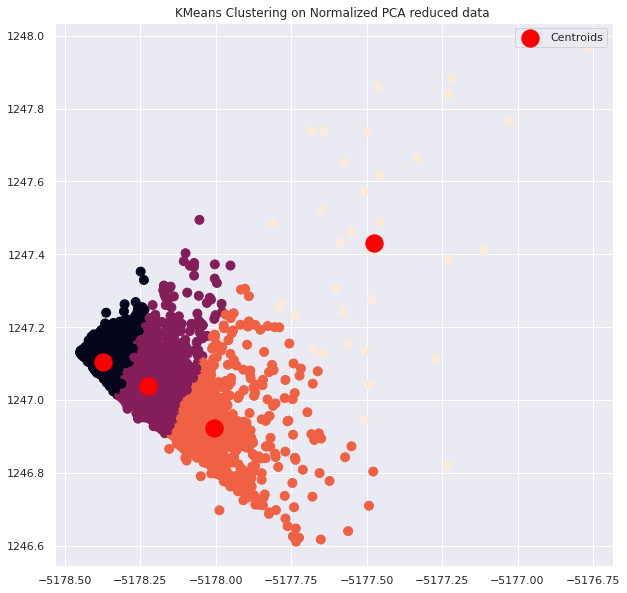

In [56]:
fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


plt.scatter(credit_normal_df ['BALANCE'],          
            credit_normal_df ['PURCHASES'],s=80,c=credit_normal_df["kmeans_labels"])

plt.scatter(kmeans_normal.cluster_centers_[:, 0], kmeans_normal.cluster_centers_[:, 2], s=300, c='red', label = 'Centroids')
plt.title('KMeans Clustering on Normalized Data')
plt.legend()
plt.show()

fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


plt.scatter(credit_normal_df ['pca_1'],          
            credit_normal_df ['pca_2'],s=80,c=kmeans_normal_pca.labels_)

plt.scatter(kmeans_normal_pca.cluster_centers_[:, 0], kmeans_normal_pca.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('KMeans Clustering on Normalized PCA reduced data ')
plt.legend()
plt.show()



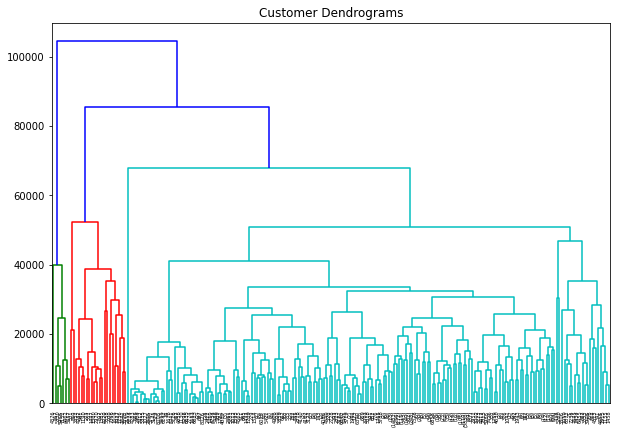

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(credit_df, method="complete"), 12, "level")


In [36]:
cost = []
cost_normal = []
from tqdm import tqdm
for k in tqdm(range(1,101)):

    kmeans_pca = KMeans(n_clusters=k, random_state=0)  #Cluster our data by choosing 5 as number of clusters
    kmeans_pca.fit(credit_df[ ["pca_1","pca_2"] ])
    cost.append(kmeans_pca.inertia_)

    kmeans_normal_pca=KMeans(n_clusters=k, random_state=0)  #Cluster our data by choosing 5 as number of clusters
    kmeans_normal_pca.fit(credit_normal_df[ ["pca_1","pca_2"] ])
    cost_normal.append(kmeans_normal_pca.inertia_)

 80%|████████  | 80/100 [08:40<03:25, 10.26s/it]

KeyboardInterrupt: ignored

In [41]:
len(x)

80

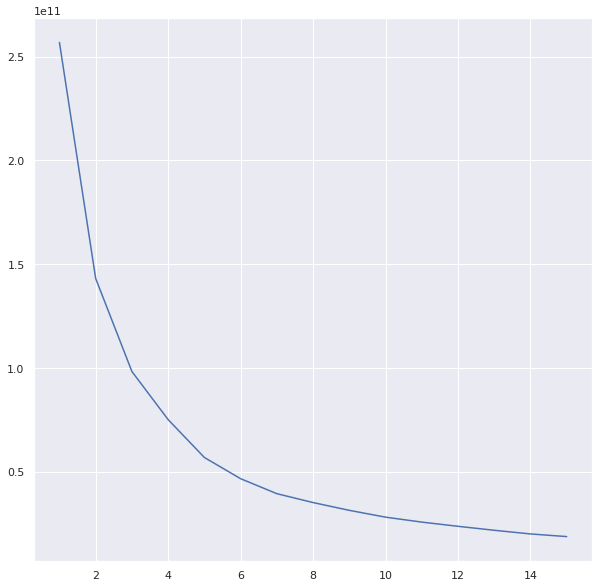

In [62]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10,10)})

x = [i for i in range(1,len(cost_normal)+1)]
sns.lineplot(x=x[:15], y=cost[:15])


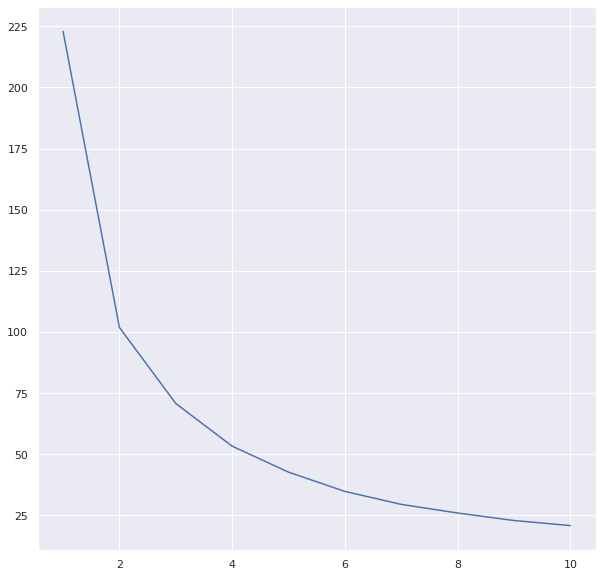

In [63]:
sns.lineplot(x=x[:10], y=cost_normal[:10])
